In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# defining probabilities
p_cloud_to_cloud = 0.5
p_clear_to_cloud = 0.1
p_sunny=0.83

# defining a function that generate the weather for the following day
# it takes as an input the probability of going from the current weather to cloudy
# by generating a random number between [0,1] tells you if this is higher or lower than that probability
def random_gen(prob_cloud):
    x=np.random.uniform(0,1)
    if(x<prob_cloud):
        return "Cloud"
    else:
        return "Clear"
    
N=100000
x=[]
ratio_sunny=[]
ratio_cloudy=[]
# simulating the forecast N times, starting from a cloudy day (it might take a while)
x.append("Cloud")
ratio_sunny.append(x.count("Clear"))
ratio_cloudy.append(x.count("Cloud"))

for i in range(1,N):
    if(x[i-1]=="Cloud"):
        x.append(random_gen(p_cloud_to_cloud))
    elif(x[i-1]=="Clear"):
        x.append(random_gen(p_clear_to_cloud))
    else:
        print("ERRORE")

    ratio_sunny.append(x.count("Clear")/(i+1))
    ratio_cloudy.append(x.count("Cloud")/(i+1))



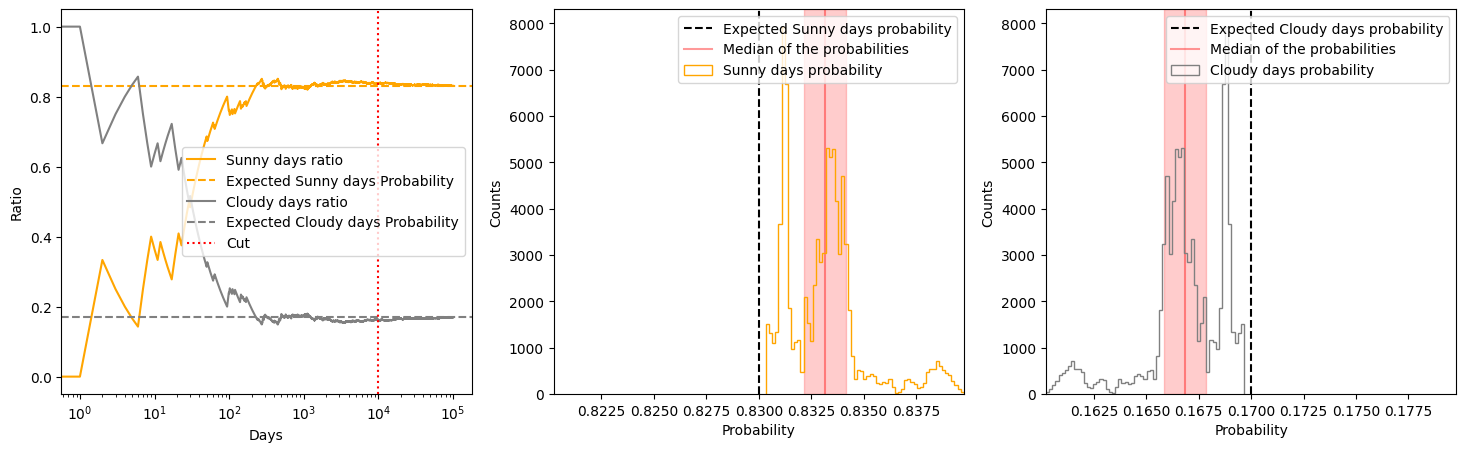

In [9]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
# plotting the simulation results
cut=10000
ax[0].plot(range(N),ratio_sunny,linestyle='-',color='Orange',label='Sunny days ratio')
ax[0].axhline(p_sunny,linestyle='--',color='Orange',label='Expected Sunny days Probability')
ax[0].plot(range(N),ratio_cloudy,linestyle='-',color='Gray',label='Cloudy days ratio')
ax[0].axhline(1-p_sunny,linestyle='--',color='Grey',label='Expected Cloudy days Probability')
ax[0].axvline(cut,linestyle=':',color='Red',label='Cut')
ax[0].set(xlabel='Days',ylabel='Ratio',xscale='log')
ax[0].legend()

# the following distributions take into account the MCMC burn proposed in the left plot
ax[1].axvline(p_sunny,linestyle='--',color='Black',label='Expected Sunny days probability')
ax[2].axvline(1-p_sunny,linestyle='--',color='Black',label='Expected Cloudy days probability')
ax[1].axvspan(np.median(ratio_sunny[cut:])-median_abs_deviation(ratio_sunny[cut:]),
              np.median(ratio_sunny[cut:])+median_abs_deviation(ratio_sunny[cut:]),color='Red',alpha=0.2)
ax[2].axvspan(np.median(ratio_cloudy[cut:])-median_abs_deviation(ratio_cloudy[cut:]),
              np.median(ratio_cloudy[cut:])+median_abs_deviation(ratio_cloudy[cut:]),color='Red',alpha=0.2)
ax[1].axvline(np.median(ratio_sunny[cut:]),linestyle='-',color='Red',label='Median of the probabilities',alpha=0.4)
ax[2].axvline(np.median(ratio_cloudy[cut:]),linestyle='-',color='Red',label='Median of the probabilities',alpha=0.4)
ax[1].hist(ratio_sunny[cut:],bins='scott',color='Orange',histtype='step',density=False,label='Sunny days probability')
ax[2].hist(ratio_cloudy[cut:],bins='scott',color='Gray',histtype='step',density=False,label='Cloudy days probability')

ax[1].set(xlabel='Probability',ylabel='Counts',
          xlim=(2*p_sunny-max(ratio_sunny[cut:]),max(ratio_sunny[cut:])))
ax[2].set(xlabel='Probability',ylabel='Counts',
          xlim=(min(ratio_cloudy[cut:]),2*(1-p_sunny)-min(ratio_cloudy[cut:])))

ax[1].legend()
ax[2].legend()

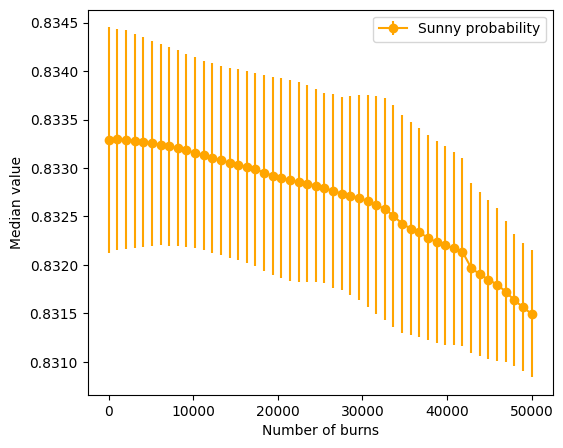

In [ ]:
# controlling how the median changes depending on the number of burns
burns=np.linspace(1,0.5*N,50,dtype=int)
medians=[np.median(ratio_sunny[i:]) for i in burns]
errors=[median_abs_deviation(ratio_sunny[i:]) for i in burns]
fig,ax=plt.subplots(1,1,figsize=(6,5))
ax.errorbar(burns,medians,yerr=errors,marker='o',linestyle='-',color='orange',label='Sunny probability')
# ax.axhline(p_sunny,linestyle='--',color='Orange',label='Expected Sunny days Probability')
ax.set(xlabel='Number of burns',ylabel='Median value')
ax.legend()